In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

from rdkit import Chem 
from rdkit.Chem import Descriptors

from collections import defaultdict
from tqdm import tqdm


from functions import  tokenizer

In [2]:

def find_convergence_point(data, epsilon=0.01, consecutive_points=1):
    """
    Finds the index of the first value where the data has converged.

    Args:
        data (list or array-like): A list or array of numerical data.
        epsilon (float, optional): Threshold to detect stabilization. Defaults to 0.01.
        consecutive_points (int, optional): Number of consecutive points that must meet the stabilization condition. Defaults to 1.

    Returns:
        int or None: The index of the first value where the data has converged, or None if no such point is found.
    """
    # Calculate the absolute differences between consecutive values
    diffs = np.abs(np.diff(data))
    
    # Find the indices where the differences are less than epsilon
    stabilization_points = np.where(diffs < epsilon)[0]
    
    # Check if there are enough consecutive points that meet the condition
    for idx in range(len(stabilization_points) - consecutive_points + 1):
        if np.all(stabilization_points[idx:idx + consecutive_points] == np.arange(stabilization_points[idx], stabilization_points[idx] + consecutive_points)):
            return stabilization_points[idx] + 1  # +1 because np.diff reduces the size of the array by 1
    
    return None


In [3]:
def molW(smiles):
    return Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles))

In [4]:
def fpd2(smiles):
    return Chem.Descriptors.FpDensityMorgan2(Chem.MolFromSmiles(smiles)) 


In [5]:
def count_unique_atoms(smiles):
    # Crear un objeto Mol a partir de la cadena SMILES
    mol = Chem.MolFromSmiles(smiles)
    
    if mol is None:
        raise ValueError(f'No se pudo crear una molécula a partir de la cadena SMILES: {smiles}')
    
    # Extraer los tipos de átomos
    atom_types = set()
    for atom in mol.GetAtoms():
        atom_types.add(atom.GetSymbol())
    
    # Contar el número de átomos distintos
    return len(atom_types)

In [6]:
# molW('CCO')

In [7]:
db_red = 'clean_db_reddb.csv'
db_qm9 = 'clean_db_qm9_odd.csv'
db_nfa = 'clean_db_nfa_odd.csv'
db_lyp = 'clean_db_pubchemB3LYP_100k_odd.csv'
db_pm6 = 'clean_db_pubchemPM6_100k_odd.csv'

In [8]:
def renamedict(df, name):
    cols = df.columns.tolist()
    ren = {}
    for i in cols:
        ren.update({i: name + '_' + i})
    return ren

In [9]:
req_red = 'required_bits_clean_db_reddb.csv'
req_qm9 = 'required_bits_clean_db_qm9.csv'
req_nfa = 'required_bits_clean_db_nfa.csv'
req_lyp = 'required_bits_clean_db_pubchemB3LYP_100k.csv'
req_pm6 = 'required_bits_clean_db_pubchemPM6_100k.csv'

In [10]:
def ratioOneZero(df):
    df['ratio'] = 100 * df['unique_bits']/df['bit']
    return df


In [11]:
df_red = ratioOneZero(pd.read_csv(req_red))
df_qm9 = ratioOneZero(pd.read_csv(req_qm9))
df_nfa = ratioOneZero(pd.read_csv(req_nfa))
df_lyp = ratioOneZero(pd.read_csv(req_lyp))
df_pm6 = ratioOneZero(pd.read_csv(req_pm6))

In [12]:
# x= renamedict(df_redE, 'red')
# x

In [13]:
# df_red = df_redE.rename( columns = renamedict( df_redE, 'red' ))
# df_qm9 = df_qm9E.rename( columns = renamedict( df_qm9E, 'qm9' ))
# df_nfa = df_nfaE.rename( columns = renamedict( df_nfaE, 'nfa' ))
# df_lyp = df_lypE.rename( columns = renamedict( df_lypE, 'lyp' ))
# df_pm6 = df_pm6E.rename( columns = renamedict( df_pm6E, 'pm6' ))

In [14]:
df_red

,case,idx,bit,unique_bits,times,sumtime,memory,internal_diversity,ratio
0,clean_db_reddb_odd,9,512,461,0.005732,2.359966,4065792,0.834191,90.039062
1,clean_db_reddb_odd,10,1024,696,0.008413,2.446357,8131584,0.842216,67.968750
2,clean_db_reddb_odd,11,2048,885,0.017142,2.599030,16263168,0.850586,43.212891
3,clean_db_reddb_odd,12,4096,1002,0.028200,2.885086,32526336,0.852637,24.462891
4,clean_db_reddb_odd,13,8192,1074,0.046927,3.540170,65052672,0.855447,13.110352
5,clean_db_reddb_odd,14,16384,1130,0.084484,4.732993,130105344,0.855906,6.896973
6,clean_db_reddb_odd,15,32768,1143,0.161004,7.096421,260210688,0.855957,3.488159
7,clean_db_reddb_odd,16,65536,1154,0.333354,11.918334,520421376,0.856090,1.760864
8,clean_db_reddb_odd,17,131072,1157,0.773643,25.089541,1040842752,0.856097,0.882721
9,clean_db_reddb_odd,18,262144,1158,1.675581,45.777360,2081685504,0.856107,0.441742


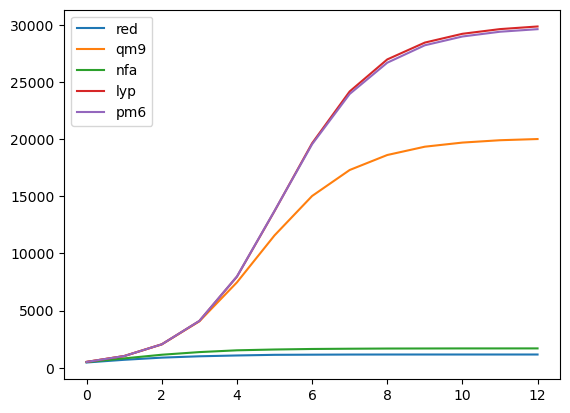

In [15]:
plt.plot(df_red['unique_bits'], label = 'red')
plt.plot(df_qm9['unique_bits'], label = 'qm9')
plt.plot(df_nfa['unique_bits'], label = 'nfa')
plt.plot(df_lyp['unique_bits'], label = 'lyp')
plt.plot(df_pm6['unique_bits'], label = 'pm6')
plt.legend()

plt.show()

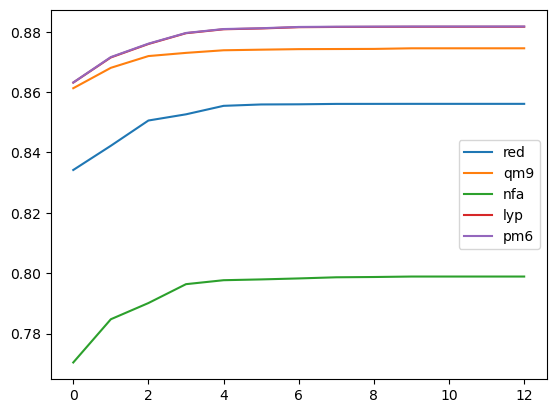

In [16]:
plt.plot(df_red['internal_diversity'], label = 'red')
plt.plot(df_qm9['internal_diversity'], label = 'qm9')
plt.plot(df_nfa['internal_diversity'], label = 'nfa')
plt.plot(df_lyp['internal_diversity'], label = 'lyp')
plt.plot(df_pm6['internal_diversity'], label = 'pm6')
plt.legend()

plt.show()

In [122]:
x_red = find_convergence_point(df_red['internal_diversity'], 0.001 , 1 ) + 9
x_qm9 = find_convergence_point(df_qm9['internal_diversity'], 0.001 , 1 ) + 9
x_nfa = find_convergence_point(df_nfa['internal_diversity'], 0.001 , 1 ) + 9
x_lyp = find_convergence_point(df_lyp['internal_diversity'], 0.001 , 1 ) + 9
x_pm6 = find_convergence_point(df_pm6['internal_diversity'], 0.001 , 1 ) + 9

In [123]:
print( "2^",x_red, '=' , 2**x_red )
print( "2^",x_qm9, '=' , 2**x_qm9 )
print( "2^",x_nfa, '=' , 2**x_nfa )
print( "2^",x_lyp, '=' , 2**x_lyp )
print( "2^",x_pm6, '=' , 2**x_pm6 )

2^ 14 = 16384
2^ 13 = 8192
2^ 14 = 16384
2^ 14 = 16384
2^ 14 = 16384


In [19]:
df_red

,case,idx,bit,unique_bits,times,sumtime,memory,internal_diversity,ratio
0,clean_db_reddb_odd,9,512,461,0.005732,2.359966,4065792,0.834191,90.039062
1,clean_db_reddb_odd,10,1024,696,0.008413,2.446357,8131584,0.842216,67.968750
2,clean_db_reddb_odd,11,2048,885,0.017142,2.599030,16263168,0.850586,43.212891
3,clean_db_reddb_odd,12,4096,1002,0.028200,2.885086,32526336,0.852637,24.462891
4,clean_db_reddb_odd,13,8192,1074,0.046927,3.540170,65052672,0.855447,13.110352
5,clean_db_reddb_odd,14,16384,1130,0.084484,4.732993,130105344,0.855906,6.896973
6,clean_db_reddb_odd,15,32768,1143,0.161004,7.096421,260210688,0.855957,3.488159
7,clean_db_reddb_odd,16,65536,1154,0.333354,11.918334,520421376,0.856090,1.760864
8,clean_db_reddb_odd,17,131072,1157,0.773643,25.089541,1040842752,0.856097,0.882721
9,clean_db_reddb_odd,18,262144,1158,1.675581,45.777360,2081685504,0.856107,0.441742


In [97]:
df_nfa

,case,idx,bit,unique_bits,times,sumtime,memory,internal_diversity,ratio
0,clean_db_nfa_odd,9,512,496,0.023915,9.979953,13119488,0.770397,96.875000
1,clean_db_nfa_odd,10,1024,819,0.025169,10.216151,26238976,0.784726,79.980469
2,clean_db_nfa_odd,11,2048,1138,0.038879,10.777745,52477952,0.790093,55.566406
3,clean_db_nfa_odd,12,4096,1369,0.065807,11.748911,104955904,0.796350,33.422852
4,clean_db_nfa_odd,13,8192,1525,0.159159,13.799688,209911808,0.797661,18.615723
5,clean_db_nfa_odd,14,16384,1596,0.320400,17.753762,419823616,0.797924,9.741211
6,clean_db_nfa_odd,15,32768,1642,0.519110,25.346150,839647232,0.798250,5.010986
7,clean_db_nfa_odd,16,65536,1664,1.100794,40.837800,1679294464,0.798629,2.539062
8,clean_db_nfa_odd,17,131072,1680,2.701671,80.642954,3358588928,0.798722,1.281738
9,clean_db_nfa_odd,18,262144,1685,5.105899,147.615079,6717177856,0.798875,0.642776


In [98]:
df_qm9

,case,idx,bit,unique_bits,times,sumtime,memory,internal_diversity,ratio
0,clean_db_qm9_odd,9,512,512,0.045634,12.960488,33833472,0.861289,100.000000
1,clean_db_qm9_odd,10,1024,1024,0.072406,14.280105,67666944,0.868048,100.000000
2,clean_db_qm9_odd,11,2048,2048,0.110558,15.551900,135333888,0.871942,100.000000
3,clean_db_qm9_odd,12,4096,4059,0.194941,18.002322,270667776,0.873001,99.096680
4,clean_db_qm9_odd,13,8192,7469,0.385658,23.023258,541335552,0.873863,91.174316
5,clean_db_qm9_odd,14,16384,11575,0.639051,33.260123,1082671104,0.874062,70.648193
6,clean_db_qm9_odd,15,32768,15021,1.414066,53.078677,2165342208,0.874238,45.840454
7,clean_db_qm9_odd,16,65536,17294,2.870530,93.471682,4330684416,0.874276,26.388550
8,clean_db_qm9_odd,17,131072,18605,7.068181,192.974143,8661368832,0.874313,14.194489
9,clean_db_qm9_odd,18,262144,19332,14.203969,370.841415,17322737664,0.874514,7.374573


In [20]:
def get_cutoffIndex(df, threshold = 5):
    ubits = df.unique_bits.tolist()
    ubitsDiff = 100 * np.array( [256] + np.diff(ubits).tolist() ) / ubits
    idxCutOff = np.where( ubitsDiff < threshold)[0][0]
    idxVal = df.idx.tolist()[idxCutOff]
    # print(f'Optimal Bit Size: 2^{ idxVal} = {2**idxVal}')
    return idxVal
    

(13, 13, 13)

In [21]:
cubits = df_lyp.unique_bits.tolist()
cubitsDiff = 100 * np.array( [256] + np.diff(cubits).tolist() ) / cubits
print(cubitsDiff)


[50.         50.         50.         49.96335206 48.62558052 41.84247025
 30.22106764 18.75853507 10.38050734  5.17987129  2.63302061  1.38438682
  0.77062253]


In [22]:
peros = []
for k in range(4,102):
    # print(k)
    if k % 5 == 0 or k == 1 or k % 10 ==0:
        x = get_cutoffIndex(df_lyp, k)
        peros.append([k,x])


In [23]:
peros

[[5, 19],
 [10, 18],
 [15, 17],
 [20, 16],
 [25, 16],
 [30, 16],
 [35, 15],
 [40, 15],
 [45, 14],
 [50, 12],
 [55, 9],
 [60, 9],
 [65, 9],
 [70, 9],
 [75, 9],
 [80, 9],
 [85, 9],
 [90, 9],
 [95, 9],
 [100, 9]]

In [24]:
# def plotsMTUP(dfs, colors, labels):

#     f_labels = []
#     for k in range(dfs[0].shape[0]):
#         idx = dfs[0]["idx"][k]
#         # val = dfs[0]["bit"][k]
#         lb = f'$2^{{{idx}}}$ '
#         f_labels.append(lb)

#     x_id = [i for i in range(len(f_labels))]
#     x_if = [i + 9 for i in range(len(f_labels))]


#     styles = ['-o', '--^', ':s', '-.*', '-x']
#     fig, axs = plt.subplots(ncols =2, nrows=2, figsize = (21, 8)  )

#     ax1 = axs[0, 0]
#     ax2 = axs[0, 1]
#     ax3 = axs[1, 0]
#     ax4 = axs[1, 1]
    
#     # ax1.set_title('Required Memory')
#     # ax2.set_title('Time Calculating MFP')
#     # ax3.set_title('Unfolding Bits')

#     # ax1t = ax1.secondary_xaxis('top')
#     # ax2t = ax2.secondary_xaxis('top')
#     # ax3t = ax3.secondary_xaxis('top')

#     vals_percentages = []

#     for iter, item in enumerate(dfs):
#         val_perc = []

#         for k in range(1,102):
#             if k % 5 == 0 or k == 1 or k % 10 ==0:
#                 val_perc.append(get_cutoffIndex(item, k))
#         vals_percentages.append(val_perc)

#         x_positions = np.arange(item.shape[0])
#         x_labels = [ str(i) for i in item['bit'].tolist() ]
    
#         y_mem = np.array( item['memory'].tolist() ) / (1024 ** 3)
#         y_tim = np.array( item['times'].tolist()  ) 
#         y_bit = np.array( item['unique_bits'].tolist()) /1000

#         ax1.plot( x_positions, y_mem, styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])
#         ax2.plot( x_positions, y_tim, styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])
#         ax3.plot( x_positions, y_bit, styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])
#         ax4.plot(vals_percentages[iter], np.arange( len( vals_percentages[iter] ) ), styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])


#     ypos = [i  for i in range( len(vals_percentages[-1]) ) if i % 4 == 0]
#     ylab = [str(i * int(np.ceil(100/len( vals_percentages[-1] ))) ) for i in range( len( vals_percentages[-1] ) ) if i % 4 == 0]
    
#     inset_position = [0.075, 0.5, 0.3, 0.4]  # [left, bottom, width, height] in fraction of ax3's bbox
#     ax3_zoom = fig.add_axes([ax3.get_position().x0 + inset_position[0] * ax3.get_position().width,
#                              ax3.get_position().y0 + inset_position[1] * ax3.get_position().height,
#                              inset_position[2] * ax3.get_position().width,
#                              inset_position[3] * ax3.get_position().height])

#     for iter in range(len(dfs)):  # Only plot the first two DataFrames in the zoomed inset
#         item = dfs[iter]
#         x_positions = np.arange(item.shape[0])
#         y_bit = np.array(item['unique_bits'].tolist())
        
#         ax3_zoom.plot(x_positions, y_bit, styles[iter], dashes = dashesV[iter],  color=colors[iter], label=labels[iter])

#     inset_position2 = [0.55, 0.55, 0.4, 0.4]  # [left, bottom, width, height] in fraction of ax3's bbox
#     ax4_zoom = fig.add_axes([ax4.get_position().x0 + inset_position2[0] * ax4.get_position().width,
#                              ax4.get_position().y0 + inset_position2[1] * ax4.get_position().height,
#                              inset_position2[2] * ax4.get_position().width,
#                              inset_position2[3] * ax4.get_position().height])

#     for iter in range(len( vals_percentages )):  # Only plot the first two DataFrames in the zoomed inset
#         ax4_zoom.plot(vals_percentages[iter], np.arange( len( vals_percentages[iter] ) ), styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])
        
#     y_ticks4z = np.linspace(0, 5, 5)
#     x_ticks4z = np.linspace(12, 21, 10)

#     ax4_zoom.axhline(y = 2.5, color = 'indigo', linestyle = '--') 
    
    
#     ax4_zoom.set_ylim([0, 2.5])
#     ax4_zoom.set_xlim([12, 21])
#     ax4_zoom.set_yticks(y_ticks4z, labels = ['0', '5', '10', '15', '20'] )
#     ax4_zoom.set_xticks(x_ticks4z, labels = f_labels[-10:])


#     ax3_zoom.set_xticks([])  # Hide x-ticks in the zoomed plot
#     y_ticks = np.linspace(0, 1800, 4)
#     ax3_zoom.set_ylim([0, 1800])
#     # ax3_zoom.set_xlim([4, 11])
#     ax3_zoom.set_yticks(y_ticks)
#     ax3_zoom.set_xticks(x_id, labels = f_labels, rotation = 90)
        
#     ax1.legend(fontsize = 11)
#     ax2.legend(fontsize = 11)
#     ax3.legend(fontsize = 11, bbox_to_anchor=(0.7,0.1))
#     ax4.legend(fontsize = 11, bbox_to_anchor=(0.15,0.52))

#     # ax1.set_xticks(x_positions, x_labels, rotation = 75)
#     # ax2.set_xticks(x_positions, x_labels, rotation = 75)
#     # ax3.set_xticks(x_positions, x_labels, rotation = 75)

#     # ax1t.set_xticks(x_id, labels = f_labels)
#     # ax2t.set_xticks(x_id, labels = f_labels)
#     # ax3t.set_xticks(x_id, labels = f_labels)

#     ax1.set_xticks(x_id, labels = f_labels)
#     ax2.set_xticks(x_id, labels = f_labels)
#     ax3.set_xticks(x_id, labels = f_labels)
#     ax4.set_xticks(x_if, labels = f_labels)

#     ax4.set_yticks(ypos, labels = ylab)
    
#     ax1.set_ylabel('Required RAM Memory [GB]', fontsize = 14)
#     ax2.set_ylabel('Time Calculating MFP [s]', fontsize = 14)
#     ax3.set_ylabel(f'Number of unique bits [$\\times 10^3 $]', fontsize = 14)

#     ax4.set_ylabel('Percentage of bit - collision [%]', fontsize = 14)
#     ax4.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)

#     ax1.grid(linewidth=0.1)
#     ax2.grid(linewidth=0.1)
#     ax3.grid(linewidth=0.1)
#     ax4.grid(linewidth=0.1)

#     # ax1.sharex(ax3)
#     # ax1.set_xticklabels([])




#     # ax1.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)
#     # ax2.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)
#     ax3.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)
#     ax1.set_yscale('log')
#     ax2.set_yscale('log')
#     plt.savefig('unfoldingMFP_MTUP.png', dpi =600)

In [25]:
# colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']
# colors = ['#FF5733', '#33FF57', '#3357FF', , '#A833FF']




In [26]:
# plotsMTUP(dfs, colors, labels)

In [27]:
# def plotRatios(dfs, colors, labels):
#     styles = ['-o', '--^', ':s', '-.*', '-x']
#     plt.figure(figsize = (10.5, 4)  )
#     for iter, item in enumerate(dfs):
#         x_positions = np.arange(item.shape[0])
#         y_rat = np.array( item['ratio'].tolist() ) 
#         plt.plot( x_positions, y_rat, styles[iter], dashes = dashesV[iter],  color = colors[iter], label = labels[iter])

#     plt.xticks([i for i in range(len(df_red))], [fr'$2^{{{i+9}}}$' for i in range(len(df_red))])
#     plt.yticks([i * 20 for i in range(6)], [str( i * 20 ) for i in range(6) ])

#     plt.ylabel('(Number of unique bits)/nBits [%]', fontsize = 14)
#     plt.xlabel('nBits in MFP', fontsize = 14)
#     plt.grid(linewidth = 0.1)
#     plt.legend(fontsize = 11)
#     plt.show()


In [28]:
# plotRatios(dfs, colors, labels)

In [29]:
# # 2^9 to 2^21
# powers_of_2 = {f"2^{i}": 2**i for i in range(9, 22)}

# # Crear un DataFrame con los valores organizados en 4 columnas
# datap1 = {
#     r"$2^x$": [fr"$2^{{{i}}}$" for i in range(9, 14)] ,
#     "nBits": [2**i for i in range(9, 14)] ,
# }
# datap2 = {
#     r"$2^x$": [fr"$2^{{{i}}}$" for i in range(14, 18)],
#     "nBits": [2**i for i in range(14, 18)] ,
# }

# datap3 = {
#     r"$2^x$": [fr"$2^{{{i}}}$" for i in range(18, 22)],
#     "nBits": [2**i for i in range(18, 22)] ,
# }

# dfp1 = pd.DataFrame(datap1)
# dfp2 = pd.DataFrame(datap2)
# dfp3 = pd.DataFrame(datap3)
# dfp1, dfp2, dfp3

In [30]:
# fig2, axe = plt.subplots(figsize = (10,4))

# # Ocultar el eje
# axe.axis('tight')
# axe.axis('off')

# # Crear una tabla en la figura
# table1 = axe.table(cellText=dfp1.values, colLabels=dfp1.columns, cellLoc='center',  bbox = (0.00 , 0, 0.3, 1 ))
# table2 = axe.table(cellText=dfp2.values, colLabels=dfp2.columns, cellLoc='center',  bbox = (0.33 , 0, 0.3, 1 ))
# table3 = axe.table(cellText=dfp3.values, colLabels=dfp3.columns, cellLoc='center',  bbox = (0.66 , 0, 0.3, 1 ))


# for table in [table1, table2, table3]:
#     table.auto_set_font_size(False)
#     table.set_fontsize(24)
#     table.scale(1, 4)
#     for key, cell in table.get_celld().items():
#         cell.set_edgecolor('lightgrey')  # cell edge color
#         cell.set_linewidth(0.45)  # cell linewidth

# # pos1 = table1.get_window_extent(axe).transformed(fig2.dpi_scale_trans.inverted())
# # pos2 = table2.get_window_extent(axe).transformed(fig2.dpi_scale_trans.inverted())
# # pos3 = table3.get_window_extent(axe).transformed(fig2.dpi_scale_trans.inverted())





# fig2.tight_layout()
# plt.show()

In [31]:
def plotsMTUPRB(dfs, colors, labels, ids):

    f_labels = []
    for k in range(dfs[0].shape[0]):
        idx = dfs[0]["idx"][k]
        # val = dfs[0]["bit"][k]
        lb = f'$2^{{{idx}}}$ '
        f_labels.append(lb)

    x_id = [i for i in range(len(f_labels))]
    x_if = [i + 9 for i in range(len(f_labels))]


    styles = [ '-.>', '-o', '--d', '-.*', '-x']
    dashesV=[(2, 4), (), (5,10), (3, 5, 1, 5, 1, 5), (4,2)]
    msVals = [6,8,6,4,6]

    fig, axs = plt.subplots(ncols =2, nrows=3, figsize = (21, 12)  )
    label_subplots = [ '(a)','(b)','(c)','(d)','(e)','(f)' ]

    ax1 = axs[0, 0]
    ax2 = axs[0, 1]
    ax3 = axs[1, 0]
    ax4 = axs[1, 1]
    ax5 = axs[2, 0]
    ax6 = axs[2, 1]

    vals_percentages = []

    for iter, item in enumerate(dfs):

        val_perc = []

        for k in range( 2, 102 ):
            if k % 5 == 0 or k == 1 or k % 10 ==0:
                
                val_perc.append(get_cutoffIndex(item, k))
        vals_percentages.append(val_perc)

        x_positions = np.arange(item.shape[0])
        x_labels = [ str(i) for i in item['bit'].tolist() ]
    
        y_mem = np.array( item['memory'].tolist() ) / (1024 ** 3)
        # y_tim = np.array( item['times'].tolist()  ) 
        y_tim = (np.array( item['sumtime'].tolist()  ) - np.array( item['times'].tolist()  ) )/60
        y_bit = np.array( item['unique_bits'].tolist()) /1000
        y_rat = np.array( item['ratio'].tolist() ) 
        y_idv = np.array( item['internal_diversity'].tolist() ) 
        y_div =  np.diff(y_idv).tolist()
        y_div =  [ y_div[0] ] + y_div 
        # print(y_mem)


        ax1.plot( x_positions, y_mem, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax2.plot( x_positions, y_tim, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax3.plot( x_positions, y_bit, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax4.plot(vals_percentages[iter], np.arange( len( vals_percentages[iter] ) ), styles[iter], dashes = dashesV[iter],   ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax5.plot( x_positions, y_rat, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax6.plot( x_positions, y_div, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])

        # conv_point = find_convergence_point(item['internal_diversity'], 0.0001 , 1 ) 
        # value_conv = item['internal_diversity'][conv_point]
        # ax6.axhline(y = value_conv + 0.00001, color = colors[iter], linestyle = '--') 




    ypos = [i  for i in range( len(vals_percentages[-1]) ) if i % 4 == 0]
    ylab = [str(i * int(np.ceil(100/len( vals_percentages[-1] ))) ) for i in range( len( vals_percentages[-1] ) ) if i % 4 == 0]
    
    inset_position = [0.075, 0.5, 0.3, 0.4]  # [left, bottom, width, height] in fraction of ax3's bbox
    ax3_zoom = fig.add_axes([ax3.get_position().x0 + inset_position[0] * ax3.get_position().width,
                             ax3.get_position().y0 + inset_position[1] * ax3.get_position().height,
                             inset_position[2] * ax3.get_position().width,
                             inset_position[3] * ax3.get_position().height])

    for iter in range(len(dfs)):  # Only plot the first two DataFrames in the zoomed inset

        item = dfs[iter]
        x_positions = np.arange(item.shape[0])
        y_bit = np.array(item['unique_bits'].tolist())
        
        ax3_zoom.plot(x_positions, y_bit, styles[iter], dashes = dashesV[iter],   ms = msVals[iter], color=colors[iter], label=labels[iter])

    inset_position2 = [0.55, 0.51, 0.4, 0.4]  # [left, bottom, width, height] in fraction of ax3's bbox
    ax4_zoom = fig.add_axes([ax4.get_position().x0 + inset_position2[0] * ax4.get_position().width,
                             ax4.get_position().y0 + inset_position2[1] * ax4.get_position().height,
                             inset_position2[2] * ax4.get_position().width,
                             inset_position2[3] * ax4.get_position().height])

    for iter in range(len( vals_percentages )):  # Only plot the first two DataFrames in the zoomed inset

        ax4_zoom.plot(vals_percentages[iter], np.arange( len( vals_percentages[iter] ) ), styles[iter], dashes = dashesV[iter],   ms = msVals[iter], color = colors[iter], label = labels[iter])
        
    y_ticks4z = np.linspace(0, 5, 5)
    x_ticks4z = np.linspace(12, 21, 10)

    # ax4_zoom.axhline(y = 2.5, color = 'indigo', linestyle = '--') 
    
    
    ax4_zoom.set_ylim([0, 2.5])
    ax4_zoom.set_xlim([12, 21])
    ax4_zoom.set_yticks(y_ticks4z, labels = ['0', '5', '10', '15', '20'] )
    ax4_zoom.set_xticks(x_ticks4z, labels = f_labels[-10:])


    ax3_zoom.set_xticks([])  # Hide x-ticks in the zoomed plot
    y_ticks = np.linspace(0, 1800, 4)
    ax3_zoom.set_ylim([0, 1800])
    # ax3_zoom.set_xlim([4, 11])
    ax3_zoom.set_yticks(y_ticks)
    ax3_zoom.set_xticks(x_id, labels = f_labels, rotation = 90)
        
    ax1.legend(fontsize = 10)
    ax2.legend(fontsize = 10)
    ax3.legend(fontsize = 10, bbox_to_anchor=(0.7,0.55))
    ax4.legend(fontsize = 10, bbox_to_anchor=(0.15,0.52))
    ax5.legend(fontsize = 10)
    ax6.legend(fontsize = 10)
    # ax6.legend(fontsize = 10, bbox_to_anchor=(0.99,0.75))

    for iter, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
        if iter == 3: #ax4
            ax4.set_xticks(x_if, labels = f_labels, fontsize = 12 )
            ax4.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)
            ax4.set_yticks(ypos, labels = ylab)
            ax4.set_xlim([8.5,21.5])

        else:
            ax.set_xticks(x_id, labels = f_labels, fontsize = 12 )
            ax.set_xlabel('nBits of MFP (radius = 2)', fontsize = 14)

        ax.annotate(
            label_subplots[iter],
            xy=(0.0, 1.15), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=16, verticalalignment='top', fontfamily='serif',
            # bbox=dict(facecolor='0.9', edgecolor='none', pad=3.0)
            )


    
    ax1.set_ylabel('Required RAM Memory [GB]', fontsize = 14)
    ax2.set_ylabel('Time Calculating MFP [minutes]', fontsize = 14)
    # ax2.set_ylim([0,10])
    ax3.set_ylabel(f'Number of unique bits [$\\times 10^3 $]', fontsize = 14)
    ax4.set_ylabel('Percentage of bit - collision [%]', fontsize = 14)
    ax5.set_ylabel('(Number of unique bits)/nBits [%]', fontsize = 14)
    ax6.set_ylabel('Change in Internal Diversity', fontsize = 14)

    # ax6.set_ylim([0.7, 0.90])


    # ax1.grid(linewidth=0.1)
    # ax2.grid(linewidth=0.1)
    # ax3.grid(linewidth=0.1)
    # ax4.grid(linewidth=0.1)
    # ax5.grid(linewidth=0.1)
    # ax6.grid(linewidth=0.1)

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    fig.subplots_adjust(hspace=0.35)
    # ax1.set_ylim([0,1])


    # plt.savefig('unfoldingMFP_MTUP.png', dpi =600)
    plt.savefig(f'unfoldingMFP_MTUP{ids}.eps', dpi = 1200)
    plt.savefig(f'unfoldingMFP_MTUP{ids}.svg', dpi = 1200)

In [32]:

# dfs = [ df_red, df_nfa, df_lyp, df_pm6, df_qm9 ]
# labels = ['RedDB (16 k)', 'NFA (25 k)', 'PubChem1 (50 k)', 'PubChem2 (50 k)', 'QM9 (66 k)' ]
# styles = ['-o', '--^', '-.*', ':s', '-x']
# colors = ['black', '#4363d8', '#388e3c', '#fbc02d', 'red']



In [33]:

dfs = [ df_red, df_nfa, df_qm9 ]
labels = ['RedDB (7.5 k)', 'NFA (25 k)', 'QM9 (66 k)' ]
styles = ['-o', '--^', '-.*']
colors = [ '#4363d8', '#388e3c', '#fbc02d', ]



In [34]:

# dfs = [ df_nfa, df_lyp, df_pm6, df_qm9 ]
# labels = ['NFA (25 k)', 'PubChem1 (50 k)', 'PubChem2 (50 k)', 'QM9 (66 k)' ]
# colors = ['#32a953ff', '#4363d8',  '#fdbb05ff', '#e94335ff']
# dashes=[(5,1), (5,5), (5,1), (5,1)]
# msVals = [6,8,8,6]



In [35]:
# plotsMTUPRB(dfs, colors, labels, '_4Dbs')

In [36]:
# 2**17

In [37]:
# test = np.random.randint(2,size=10000*(2**17))

In [38]:
# 80000

In [39]:

# dfs = [ df_red, df_nfa, df_lyp, df_pm6, df_qm9 ]
# labels = ['RedDB (16 k)', 'NFA (25 k)', 'PubChem1 (50 k)', 'PubChem2 (50 k)', 'QM9 (66 k)' ]
# colors = ['purple', '#32a953ff', '#4363d8',  '#fdbb05ff', '#e94335ff']
# dashes=[(5,1), (5,5), (5,1), (5,1), (5,2)]
# msVals = [6,8,8,6,6]



In [40]:

dfs = [ df_red, df_nfa, df_qm9 ]
labels = ['RedDB (7.5 k) ', 
          'NFA (25 k)     ', 
          'QM9 (66 k)    ' ]
styles = ['-o', '--^', '-.*']
colors = [ '#4363d8', '#388e3c', '#fbc02d', ]



In [41]:
# plotsMTUPRB(dfs, colors, labels, '_5Dbs')

In [42]:
def plotsMTUPRB4J(dfs, colors, labels, ids):

    f_labels = []
    for k in range(dfs[0].shape[0]):
        idx = dfs[0]["idx"][k]
        # val = dfs[0]["bit"][k]
        lb = f'$2^{{{idx}}}$ '
        f_labels.append(lb)

    x_id = [i for i in range(len(f_labels))]
    x_if = [i + 9 for i in range(len(f_labels))]

    styles = [ '-.>', '-o', '--d', '-.*', '-x']
    dashesV=[(2, 4), (), (5,10), (3, 5, 1, 5, 1, 5), (4,2)]
    msVals = [6,8,6,4,6]

    fig, axs = plt.subplots(ncols =2, nrows=2, figsize = (19, 7)  )
    label_subplots = [ '(a) Required RAM',
                       '(b) Time Calculating MFP',
                       '(c) Number of unique bits',
                       '(d) Internal Diversity' ]

    ax1 = axs[0, 0]
    ax2 = axs[0, 1]
    ax3 = axs[1, 0]
    ax4 = axs[1, 1]

    vals_percentages = []

    for iter, item in enumerate(dfs):

        val_perc = []

        for k in range( 2, 102 ):
            if k % 5 == 0 or k == 1 or k % 10 ==0:
                val_perc.append(get_cutoffIndex(item, k))
        vals_percentages.append(val_perc)

        x_positions = np.arange(item.shape[0])
        x_labels = [ str(i) for i in item['bit'].tolist() ]
    
        y_mem = np.array( item['memory'].tolist() ) / (1024 ** 3)
        # y_tim = np.array( item['times'].tolist()  ) 
        y_tim = (np.array( item['sumtime'].tolist()  ) - np.array( item['times'].tolist()  ) )/60
        y_bit = np.array( item['unique_bits'].tolist())
        maxbit = np.max(y_bit)
        y_bit = y_bit / maxbit
        y_rat = np.array( item['ratio'].tolist() ) 
        y_idv = np.array( item['internal_diversity'].tolist() ) 
        y_div =  np.diff(y_idv).tolist()
        y_div =  [ y_div[0] ] + y_div 

        ax1.plot( x_positions, y_mem, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax2.plot( x_positions, y_tim, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax3.plot( x_positions, y_bit, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax4.plot( x_positions, y_idv, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        
        initials = [(0.2, 0.5), (1.65, 0.6), (5.35, 0.6)]
        finals =   [(0.2, 0.7), (1.65, 0.4), (5.35, 0.4)]
        ax3.annotate(r'($\times$' + f' {maxbit})', xy=initials[iter], xytext=finals[iter], fontsize = 14,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', lw=1.5, color=colors[iter]))

    ypos = [i  for i in range( len(vals_percentages[-1]) ) if i % 4 == 0]
    ylab = [str(i * int(np.ceil(100/len( vals_percentages[-1] ))) ) for i in range( len( vals_percentages[-1] ) ) if i % 4 == 0]
    
    ax1.legend(fontsize = 14)
    ax2.legend(fontsize = 14)
    ax3.legend(fontsize = 14)
    ax4.legend(fontsize = 14, bbox_to_anchor=(0.7,0.775))
    # ax1.tick_params(axis='both', which='major', labelsize=16)
    # ax2.tick_params(axis='both', which='major', labelsize=16)
    # ax3.tick_params(axis='both', which='major', labelsize=16)
    # ax4.tick_params(axis='both', which='major', labelsize=16)


    for iter, ax in enumerate([ax1, ax2, ax3, ax4]):
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.set_xticks(x_id, labels = f_labels, fontsize = 18 )
        ax.set_xlabel('nBits of MFP (radius = 2)', fontsize = 18)
        # ax.xaxis.set_label_coords(0.65, -0.9)  # Mover la etiqueta del eje X hacia abajo
        ax.tick_params(axis='both', which='major', pad = 10, labelsize=18)

        ax.annotate(
            label_subplots[iter],
            xy=(0.01, 1.175), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=18, verticalalignment='top', fontfamily='serif',
            # bbox=dict(facecolor='0.9', edgecolor='none', pad=3.0)
            )

    ax1.set_ylabel('Memory [GB]', fontsize = 18)
    ax2.set_ylabel('Time [minutes]', fontsize = 18)
    ax3.set_ylabel('Number of unique bits', fontsize = 18)
    ax4.set_ylabel('Internal Diversity', fontsize = 18)

    fig.subplots_adjust(hspace=0.45)
    plt.tight_layout()
    


    plt.savefig(f'unfoldingMFP_MTUP{ids}.eps', dpi = 1200)
    plt.savefig(f'unfoldingMFP_MTUP{ids}.svg', dpi = 1200)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


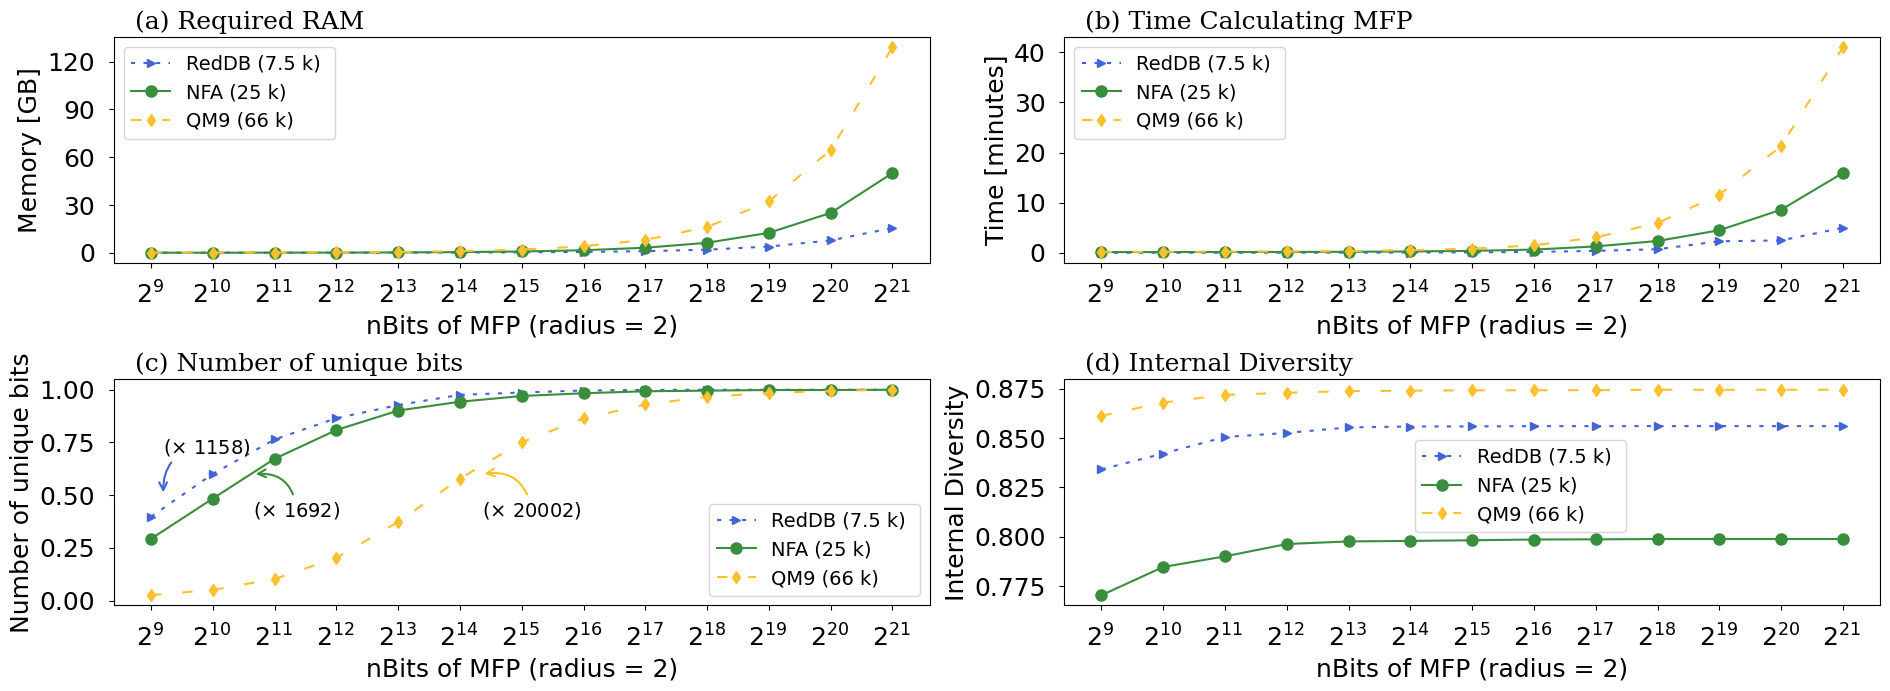

In [43]:
plotsMTUPRB4J(dfs, colors, labels, '4Plots')

In [44]:
def plotsMTUPRBVertical(dfs, colors, labels, ids):

    f_labels = []
    for k in range(dfs[0].shape[0]):
        idx = dfs[0]["idx"][k]
        # val = dfs[0]["bit"][k]
        lb = f'$2^{{{idx}}}$ '
        f_labels.append(lb)

    x_id = [i for i in range(len(f_labels))]
    x_if = [i + 9 for i in range(len(f_labels))]

    styles = [ '-.>', '-o', '--d', '-.*', '-x']
    dashesV=[(2, 4), (), (5,10), (3, 5, 1, 5, 1, 5), (4,2)]
    msVals = [6,8,6,4,6]

    fig, axs = plt.subplots(ncols =1, nrows=4, figsize = (19/2, 7*2)  )
    label_subplots = [ '(a) Required RAM',
                       '(b) Time Calculating MFP',
                       '(c) Number of unique bits',
                       '(d) Internal Diversity' ]

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]

    vals_percentages = []

    for iter, item in enumerate(dfs):

        val_perc = []

        for k in range( 2, 102 ):
            if k % 5 == 0 or k == 1 or k % 10 ==0:
                val_perc.append(get_cutoffIndex(item, k))
        vals_percentages.append(val_perc)

        x_positions = np.arange(item.shape[0])
        x_labels = [ str(i) for i in item['bit'].tolist() ]
    
        y_mem = np.array( item['memory'].tolist() ) / (1024 ** 3)
        # y_tim = np.array( item['times'].tolist()  ) 
        y_tim = (np.array( item['sumtime'].tolist()  ) - np.array( item['times'].tolist()  ) )/60
        y_bit = np.array( item['unique_bits'].tolist())
        maxbit = np.max(y_bit)
        y_bit = y_bit / maxbit
        y_rat = np.array( item['ratio'].tolist() ) 
        y_idv = np.array( item['internal_diversity'].tolist() ) 
        y_div =  np.diff(y_idv).tolist()
        y_div =  [ y_div[0] ] + y_div 

        ax1.plot( x_positions, y_mem, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax2.plot( x_positions, y_tim, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax3.plot( x_positions, y_bit, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        ax4.plot( x_positions, y_idv, styles[iter], dashes = dashesV[iter],  ms = msVals[iter], color = colors[iter], label = labels[iter])
        
        initials = [(0.2, 0.5), (1.65, 0.6), (5.35, 0.6)]
        finals =   [(0.2, 0.7), (1.65, 0.4), (5.35, 0.4)]
        ax3.annotate(r'($\times$' + f' {maxbit})', xy=initials[iter], xytext=finals[iter], fontsize = 14,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', lw=1.5, color=colors[iter]))

    ypos = [i  for i in range( len(vals_percentages[-1]) ) if i % 4 == 0]
    ylab = [str(i * int(np.ceil(100/len( vals_percentages[-1] ))) ) for i in range( len( vals_percentages[-1] ) ) if i % 4 == 0]
    
    ax1.legend(fontsize = 14)
    ax2.legend(fontsize = 14)
    ax3.legend(fontsize = 14)
    ax4.legend(fontsize = 14, bbox_to_anchor=(0.7,0.775))
    # ax1.tick_params(axis='both', which='major', labelsize=16)
    # ax2.tick_params(axis='both', which='major', labelsize=16)
    # ax3.tick_params(axis='both', which='major', labelsize=16)
    # ax4.tick_params(axis='both', which='major', labelsize=16)


    for iter, ax in enumerate([ax1, ax2, ax3, ax4]):
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.set_xticks(x_id, labels = f_labels, fontsize = 18 )
        ax.set_xlabel('nBits of MFP (radius = 2)', fontsize = 18)
        # ax.xaxis.set_label_coords(0.65, -0.9)  # Mover la etiqueta del eje X hacia abajo
        ax.tick_params(axis='both', which='major', pad = 10, labelsize=18)

        ax.annotate(
            label_subplots[iter],
            xy=(0.01, 1.175), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=18, verticalalignment='top', fontfamily='serif',
            # bbox=dict(facecolor='0.9', edgecolor='none', pad=3.0)
            )

    ax1.set_ylabel('Memory [GB]', fontsize = 18)
    ax2.set_ylabel('Time [minutes]', fontsize = 18)
    ax3.set_ylabel('Number of unique bits', fontsize = 18)
    ax4.set_ylabel('Internal Diversity', fontsize = 18)

    fig.subplots_adjust(hspace=0.45)
    plt.tight_layout()
    


    plt.savefig(f'unfoldingMFP_MTUP{ids}.eps', dpi = 1200)
    plt.savefig(f'unfoldingMFP_MTUP{ids}.svg', dpi = 1200)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


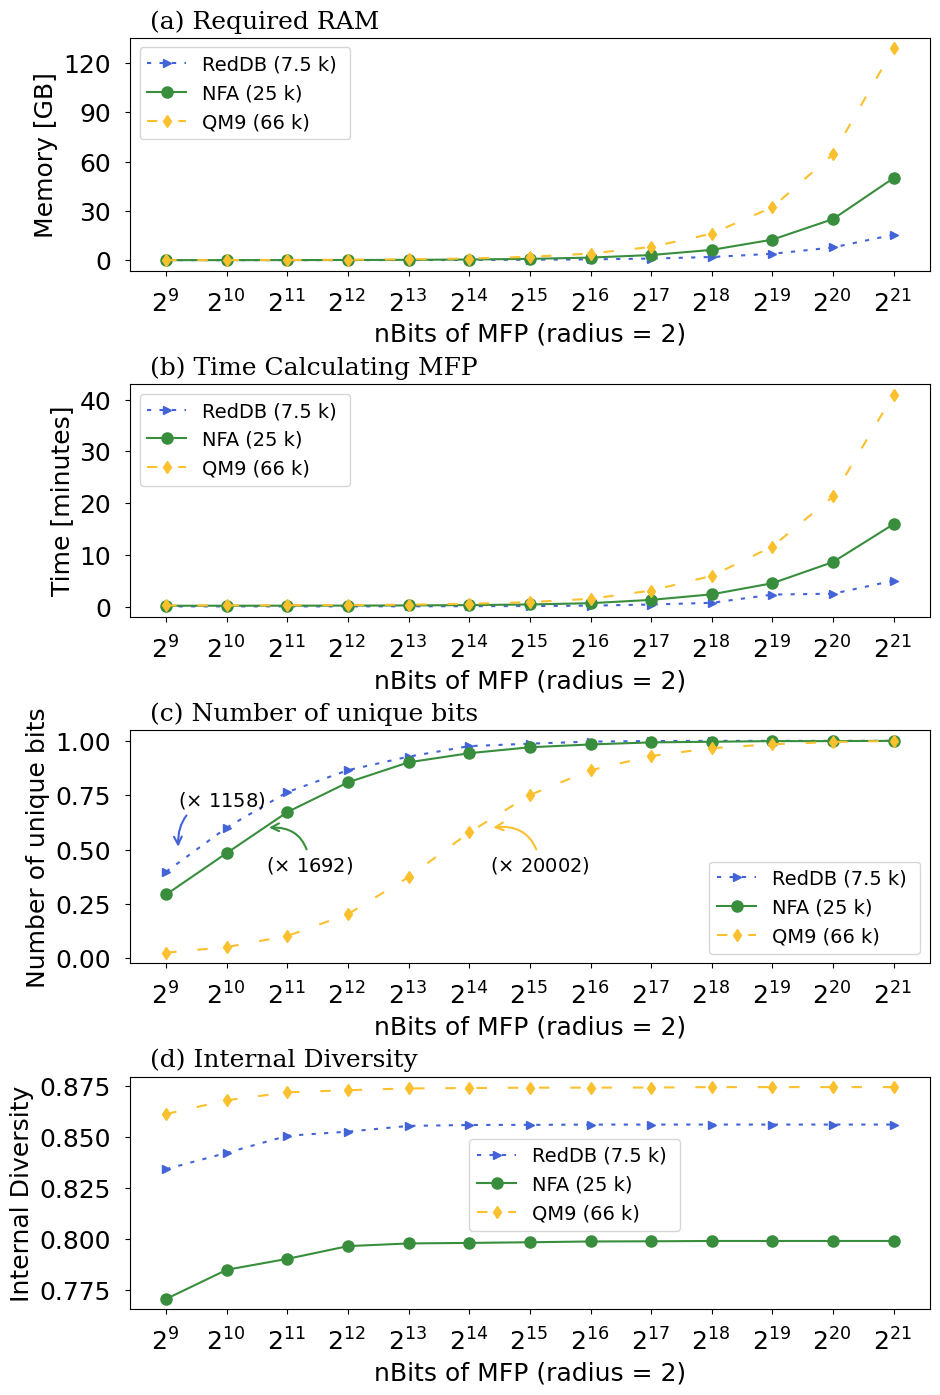

In [45]:
plotsMTUPRBVertical(dfs, colors, labels, 'Vertical')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


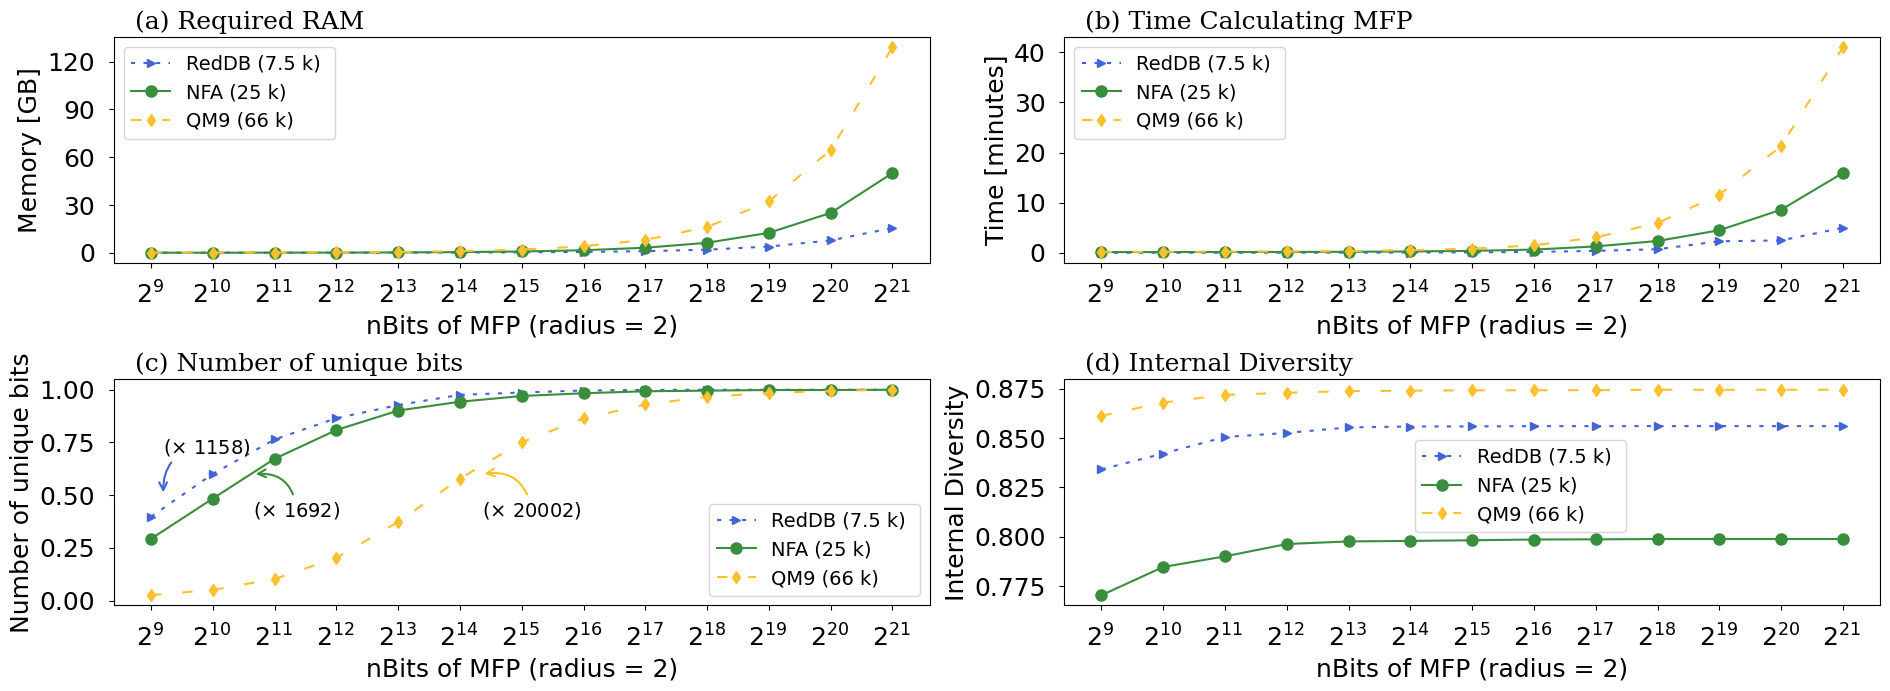

In [46]:
plotsMTUPRB4J(dfs, colors, labels, '4Plots')

In [47]:
df_red.head(3)

,case,idx,bit,unique_bits,times,sumtime,memory,internal_diversity,ratio
0,clean_db_reddb_odd,9,512,461,0.005732,2.359966,4065792,0.834191,90.039062
1,clean_db_reddb_odd,10,1024,696,0.008413,2.446357,8131584,0.842216,67.968750
2,clean_db_reddb_odd,11,2048,885,0.017142,2.599030,16263168,0.850586,43.212891


In [48]:
def transformxy(df):
    ub = 1/df['unique_bits'].to_numpy()
    return df['idx'].to_numpy(), np.log(ub - 1)

In [49]:
from scipy import stats
from scipy.optimize import curve_fit

In [50]:
def logifunc(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off

In [51]:
def fitdata(df,case, normal=None):
    x, y = df['idx'].to_numpy(), df[case].to_numpy()
    maxy = np.max(y)
    if normal:
        popt, cov = curve_fit(logifunc, x, y/maxy, p0 = [min(x), max(x), min(y/maxy), max(y/maxy)])
    else:
        popt, cov = curve_fit(logifunc, x, y, p0 = [min(x), max(x), min(y), max(y)])
    return popt, cov, x, y, maxy


In [52]:
ubparamsred, ubcovred, xred, yred, maxyred = fitdata(df_red, 'unique_bits', normal=True)
ubparamsnfa, ubcovnfa, xnfa, ynfa, maxynfa = fitdata(df_nfa, 'unique_bits', normal=True)
ubparamsqm9, ubcovqm9, xqm9, yqm9, maxyqm9 = fitdata(df_qm9, 'unique_bits', normal=True)

In [95]:
print(ubparamsred[2] )
print(ubparamsnfa[2] )
print(ubparamsqm9[2] )

0.6998931744705453
0.7146996821532167
0.8116959770375576


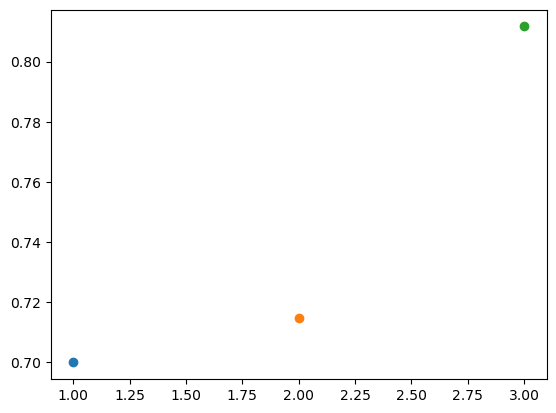

In [96]:
plt.scatter([1], ubparamsred[2])
plt.scatter([2], ubparamsnfa[2])
plt.scatter([3], ubparamsqm9[2])

In [53]:
params = [[ubparamsred, ubcovred, xred, yred, maxyred], 
          [ubparamsnfa, ubcovnfa, xnfa, ynfa, maxynfa],
          [ubparamsqm9, ubcovqm9, xqm9, yqm9, maxyqm9]]

In [54]:
def plotCases(params, labels):
    parameters = []
    colors = ['b-', 'g-', 'y-']
    plt.figure(figsize=(8,3.5))
    for iter, sets in enumerate(params):
        plt.scatter(sets[2], sets[3]/sets[4], label = labels[iter])
        plt.plot(sets[2], logifunc(sets[2],*sets[0]), colors[iter])
    plt.legend()
    plt.show()


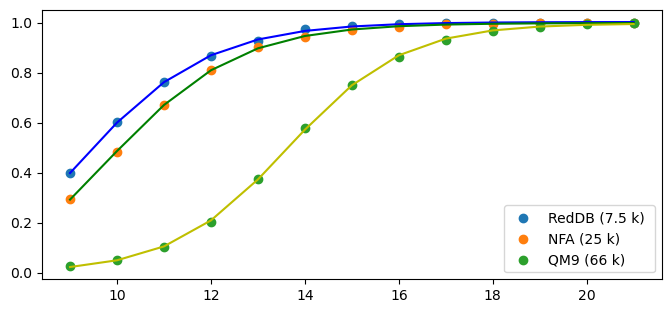

In [55]:
plotCases(params, labels)

In [56]:
# A,x0,k,off

In [57]:
print(np.array(params)[:,0])

[array([ 1.19433761,  9.03413999,  0.69989317, -0.1914622 ])
 array([ 1.10927191,  9.78623173,  0.71469968, -0.11047789])
 array([ 9.97214992e-01,  1.36345721e+01,  8.11695977e-01, -1.06738911e-04])]


/tmp/ipykernel_6148/726855753.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(params)[:,0])


In [58]:
print(ubparamsred[0]* maxyred , ubparamsred[3]* maxyred)
print(ubparamsnfa[0]* maxynfa , ubparamsnfa[3]* maxynfa)
print(ubparamsqm9[0]* maxyqm9 , ubparamsqm9[3]* maxyqm9)

1383.04295055016 -221.71322865879205
1876.8880677528268 -186.9285853050062
19946.294262178813 -2.1349916983844426


In [59]:
nmols = np.array([7619, 25624, 66081])

In [60]:
print(ubparamsred[0]/nmols[0])
print(ubparamsnfa[0]/nmols[1])
print(ubparamsqm9[0]/nmols[2])

0.00015675779084129508
4.32903491904205e-05
1.5090797530451713e-05


In [61]:
red = pd.read_csv('clean_db_reddb_odd.csv')
nfa = pd.read_csv('clean_db_nfa_odd.csv')
qm9 = pd.read_csv('clean_db_qm9_odd.csv')
lyp = pd.read_csv('clean_db_pubchemB3LYP_100k_odd.csv')
pm6 = pd.read_csv('clean_db_pubchemPM6_100k_odd.csv')

In [62]:
redsmi = red['smiles'].to_list()
nfasmi = nfa['smiles'].to_list()
qm9smi = qm9['smiles'].to_list()
lypsmi = lyp['smiles'].to_list()
pm6smi = pm6['smiles'].to_list()

In [63]:
def calculate_token_counts(smiles_list):
    """
    Calcula el conteo de tokens a partir de una lista de SMILES.
    
    Args:
        smiles_list (list): Lista de SMILES.
        tokenizer (function): Función que toma una SMILES y devuelve sus tokens.
        
    Returns:
        dict: Diccionario con los tokens como claves y sus conteos como valores.
    """
    token_counts = defaultdict(int)  # Inicializar el diccionario para contar tokens
    
    for smi in tqdm(smiles_list, desc="Processing SMILES"):
        tokens = tokenizer(smi)  # Tokenizar la SMILES actual
        for token in tokens:
            token_counts[token] += 1  # Incrementar el contador del token

    return dict(token_counts) 

In [64]:
dictred = calculate_token_counts(redsmi)
dictnfa = calculate_token_counts(nfasmi)
dictqm9 = calculate_token_counts(qm9smi)
dictlyp = calculate_token_counts(lypsmi)
dictpm6 = calculate_token_counts(pm6smi)

Processing SMILES: 100%|██████████| 50000/50000 [00:00<00:00, 189412.97it/s]


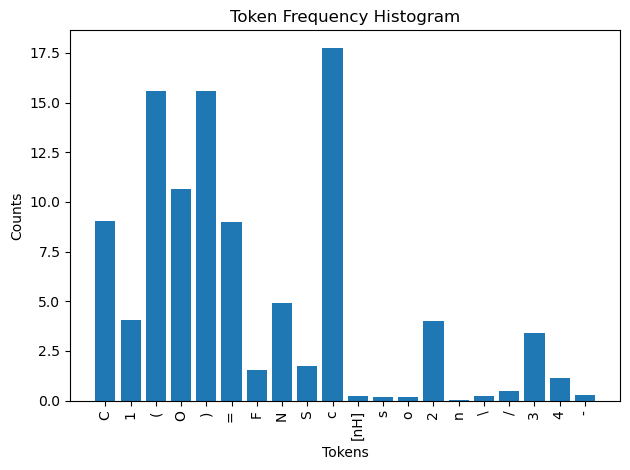

In [65]:
tokens, counts = zip(*dictred.items())
plt.bar(tokens, [100*item/sum(counts) for item in counts])
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Token Frequency Histogram')
plt.xticks(rotation=90)  # Rotar los nombres de los tokens para legibilidad
plt.tight_layout()
plt.show()

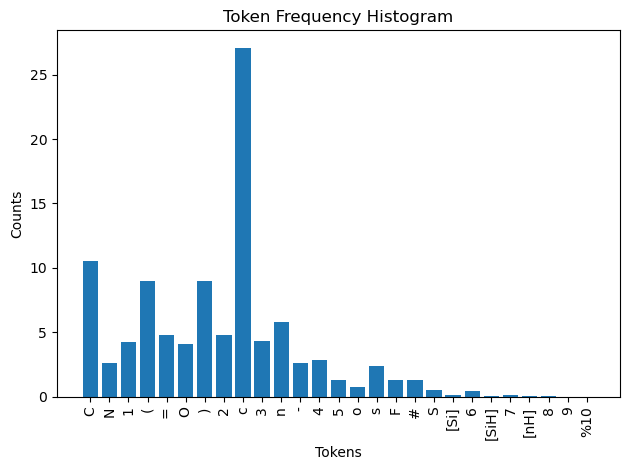

In [66]:
tokens, counts = zip(*dictnfa.items())
plt.bar(tokens, [100*item/sum(counts) for item in counts])
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Token Frequency Histogram')
plt.xticks(rotation=90)  # Rotar los nombres de los tokens para legibilidad
plt.tight_layout()
plt.show()

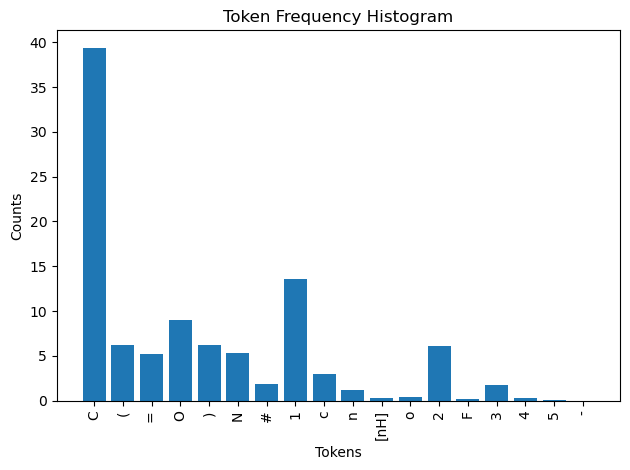

In [67]:
tokens, counts = zip(*dictqm9.items())
plt.bar(tokens, [100*item/sum(counts) for item in counts])
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Token Frequency Histogram')
plt.xticks(rotation=90)  # Rotar los nombres de los tokens para legibilidad
plt.tight_layout()
plt.show()

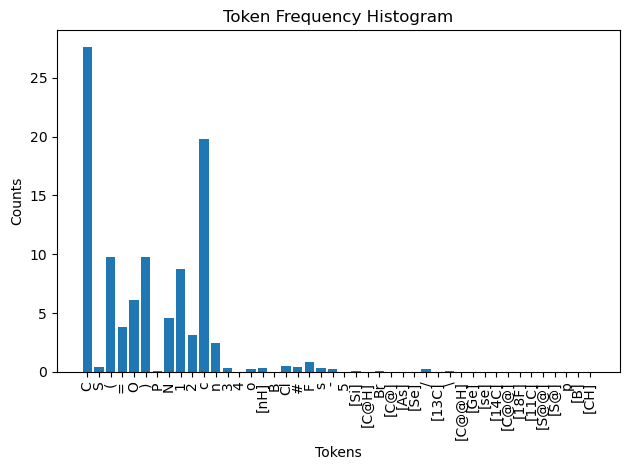

In [68]:
tokens, counts = zip(*dictlyp.items())
plt.bar(tokens, [100*item/sum(counts) for item in counts])
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Token Frequency Histogram')
plt.xticks(rotation=90)  # Rotar los nombres de los tokens para legibilidad
plt.tight_layout()
plt.show()

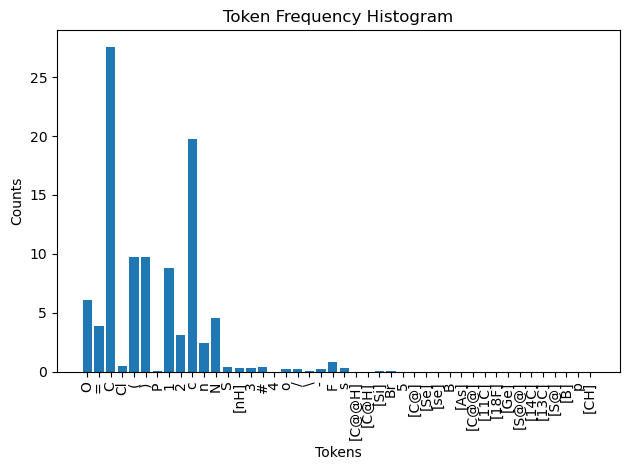

In [69]:
tokens, counts = zip(*dictpm6.items())
plt.bar(tokens, [100*item/sum(counts) for item in counts])
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Token Frequency Histogram')
plt.xticks(rotation=90)  # Rotar los nombres de los tokens para legibilidad
plt.tight_layout()
plt.show()

In [70]:
def matrixDict(dictionary):
    lendictionary = len(dictionary)
    valdictionary = [dictionary[item] for item in dictionary]
    matrix = np.zeros(( lendictionary, lendictionary) )
    for iter in range(len(dictionary)):
        matrix[iter,:] = (np.array(valdictionary) / valdictionary[iter])**(-1)
    return matrix
    

# lend = len(dictred)
# pp = np.zeros((2,2))
# print(pp)
# for item in dictred:
#     print(item, dictred[item])

In [71]:
redmat2 = matrixDict( dictred )
nfamat2 = matrixDict( dictnfa )
qm9mat2 = matrixDict( dictqm9 )
lypmat2 = matrixDict( dictlyp )
pm6mat2 = matrixDict( dictpm6 )


In [72]:

def create_token_ratio_matrix(token_counts):
    """
    Crea una matriz donde las filas y columnas son tokens,
    y los valores son el cociente entre los conteos de los tokens correspondientes.
    
    Args:
        token_counts (dict): Diccionario de tokens y sus conteos.
        
    Returns:
        pd.DataFrame: Matriz de cocientes de tokens como un DataFrame.
    """
    # Extraer los tokens y sus conteos
    tokens = list(token_counts.keys())
    counts = np.array([token_counts[token] for token in tokens])
    
    # Crear la matriz de cocientes
    ratio_matrix = counts[:, None] / counts[None, :]  # Broadcasting para calcular cocientes
    
    # Convertir a un DataFrame para facilitar la interpretación
    matrix_df = pd.DataFrame(ratio_matrix, index=tokens, columns=tokens)
    
    return matrix_df

In [73]:
redmat = create_token_ratio_matrix(dictred)
nfamat = create_token_ratio_matrix(dictnfa)
qm9mat = create_token_ratio_matrix(dictqm9)
lypmat = create_token_ratio_matrix(dictlyp)
pm6mat = create_token_ratio_matrix(dictpm6)

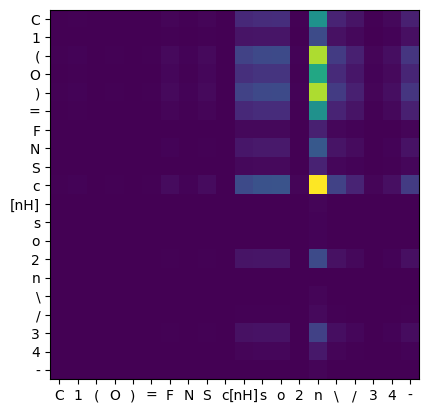

In [74]:
plt.imshow(redmat2)
plt.xticks(np.arange(len(dictred)), list(dictred))
plt.yticks(np.arange(len(dictred)), list(dictred))
plt.show()

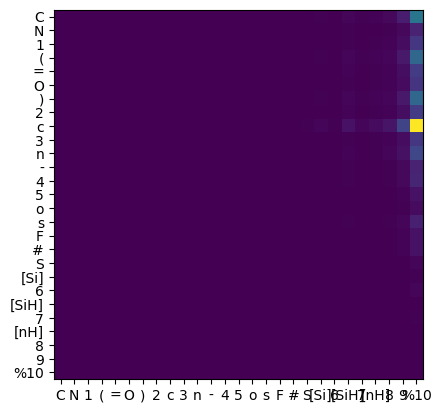

In [75]:
plt.imshow(nfamat2)
plt.xticks(np.arange(len(dictnfa)), list(dictnfa))
plt.yticks(np.arange(len(dictnfa)), list(dictnfa))
plt.show()

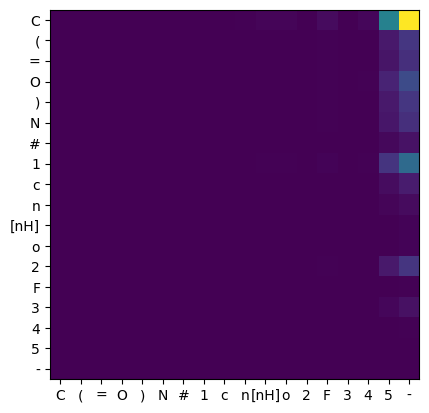

In [76]:
plt.imshow(qm9mat2)
plt.xticks(np.arange(len(dictqm9)), list(dictqm9))
plt.yticks(np.arange(len(dictqm9)), list(dictqm9))
plt.show()

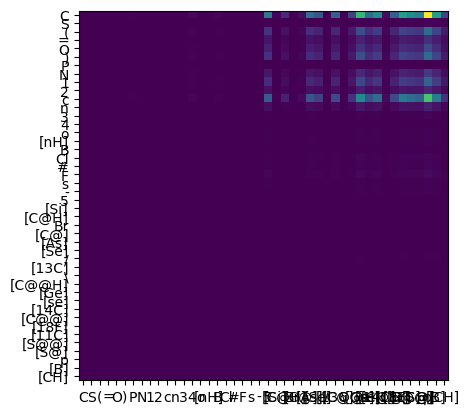

In [77]:
plt.imshow(lypmat2)
plt.xticks(np.arange(len(dictlyp)), list(dictlyp))
plt.yticks(np.arange(len(dictlyp)), list(dictlyp))
plt.show()

In [78]:
np.sum(redmat2)/len(redsmi), np.sum(nfamat2)/len(nfasmi), np.sum(qm9mat2)/len(qm9smi), np.sum(lypmat2)/len(lypsmi), np.sum(pm6mat2)/len(pm6smi)

(0.6556847917811942,
 2.8320411593406027,
 0.4594621135977919,
 38.71411948512724,
 36.22751737859111)

In [79]:
(len(redsmi)**2 / np.sum(redmat2)), (len(nfasmi)**2 / np.sum(nfamat2)), (len(qm9smi)**2 / np.sum(qm9mat2)), (len(lypsmi)**2/np.sum(lypmat2)), (len(pm6smi)**2/np.sum(pm6mat2))

(11619.912640192064,
 9047.89109984763,
 143822.5221282262,
 1291.5184605763393,
 1380.1663381313517)

In [80]:
def filter_atomic_tokens_sensitive(token_counts):
    """
    Filtra un diccionario de tokens para conservar solo aquellos que contienen letras del alfabeto (sensibles a mayúsculas).
    
    Args:
        token_counts (dict): Diccionario de tokens y sus conteos.
        
    Returns:
        dict: Diccionario filtrado con solo tokens que representan átomos.
    """
    return {token: count for token, count in token_counts.items() if any(char.isalpha() for char in token)}


def filter_atomic_tokens_insensitive(token_counts):
    """
    Filtra un diccionario de tokens para conservar solo aquellos que contienen letras del alfabeto
    (insensible a mayúsculas) y elimina tokens con conteo 0.
    
    Args:
        token_counts (dict): Diccionario de tokens y sus conteos.
        
    Returns:
        dict: Diccionario filtrado con solo tokens válidos y sin ceros.
    """
    # Diccionario auxiliar para almacenar los resultados combinados
    combined_counts = {}
    
    for token, count in token_counts.items():
        # Asegurarse de que el token contiene letras del alfabeto
        if any(char.isalpha() for char in token):
            # Convertir el token a minúsculas para insensibilidad a mayúsculas
            token_lower = token.lower()
            # Sumar los conteos combinados de versiones en minúsculas y mayúsculas
            if token_lower in combined_counts:
                combined_counts[token_lower] += count
            else:
                combined_counts[token_lower] = count
    
    # Eliminar los tokens con conteo cero
    filtered_counts = {token: count for token, count in combined_counts.items() if count > 0}
    
    return filtered_counts



In [81]:
redato = filter_atomic_tokens_sensitive(dictred)
nfaato = filter_atomic_tokens_sensitive(dictnfa)
qm9ato = filter_atomic_tokens_sensitive(dictqm9)
lypato = filter_atomic_tokens_sensitive(dictlyp)
pm6ato = filter_atomic_tokens_sensitive(dictpm6)


In [82]:
# redato = filter_atomic_tokens_insensitive(dictred)
# nfaato = filter_atomic_tokens_insensitive(dictnfa)
# qm9ato = filter_atomic_tokens_insensitive(dictqm9)
# lypato = filter_atomic_tokens_insensitive(dictlyp)
# pm6ato = filter_atomic_tokens_insensitive(dictpm6)

In [83]:
redatomatrix = matrixDict( redato )
nfaatomatrix = matrixDict( nfaato )
qm9atomatrix = matrixDict( qm9ato )
lypatomatrix = matrixDict( lypato )
pm6atomatrix = matrixDict( pm6ato )

In [84]:
print( redatomatrix.shape )
print( nfaatomatrix.shape )
print( qm9atomatrix.shape )
print( lypatomatrix.shape )
print( pm6atomatrix.shape )

(10, 10)
(12, 12)
(8, 8)
(32, 32)
(32, 32)


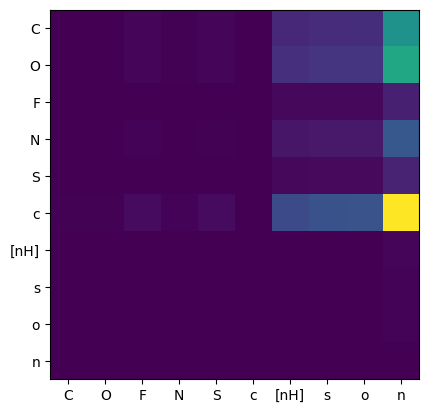

In [85]:
plt.imshow(redatomatrix)
plt.xticks(np.arange(redatomatrix.shape[0]), list(redato))
plt.yticks(np.arange(redatomatrix.shape[0]), list(redato))
plt.show()

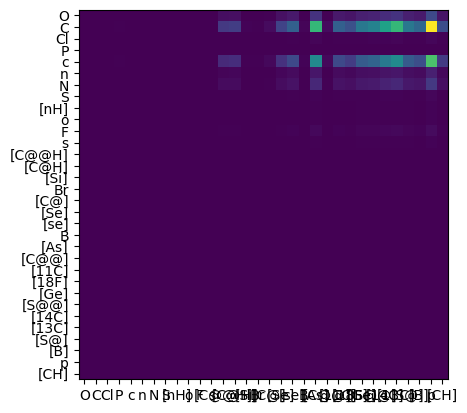

In [86]:
plt.imshow(pm6atomatrix)
plt.xticks(np.arange(pm6atomatrix.shape[0]), list(pm6ato))
plt.yticks(np.arange(pm6atomatrix.shape[0]), list(pm6ato))
plt.show()

In [87]:
redval = (len( redatomatrix.flatten()) / ( np.sum( redatomatrix) ))
nfaval = (len( nfaatomatrix.flatten()) / ( np.sum( nfaatomatrix) ))
qm9val = (len( qm9atomatrix.flatten()) / ( np.sum( qm9atomatrix) ))
lypval = (len( lypatomatrix.flatten()) / ( np.sum( lypatomatrix) ))
pm6val = (len( pm6atomatrix.flatten()) / ( np.sum( pm6atomatrix) ))

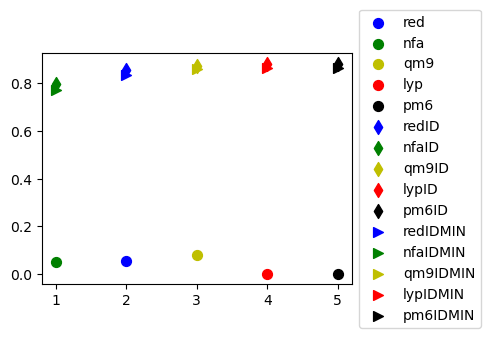

In [88]:
plt.figure(figsize=(4,3))
plt.scatter([2],[redval], label = 'red', s = 50, color = 'b')
plt.scatter([1],[nfaval], label = 'nfa', s = 50, color = 'g')
plt.scatter([3],[qm9val], label = 'qm9', s = 50, color = 'y')
plt.scatter([4],[lypval], label = 'lyp', s = 50, color = 'r')
plt.scatter([5],[pm6val], label = 'pm6', s = 50, color = 'k')

plt.scatter([2],[df_red['internal_diversity'].max()], marker ='d', label = 'redID', s = 50, color = 'b')
plt.scatter([1],[df_nfa['internal_diversity'].max()], marker ='d', label = 'nfaID', s = 50, color = 'g')
plt.scatter([3],[df_qm9['internal_diversity'].max()], marker ='d', label = 'qm9ID', s = 50, color = 'y')
plt.scatter([4],[df_lyp['internal_diversity'].max()], marker ='d', label = 'lypID', s = 50, color = 'r')
plt.scatter([5],[df_pm6['internal_diversity'].max()], marker ='d', label = 'pm6ID', s = 50, color = 'k')


plt.scatter([2],[df_red['internal_diversity'].min()], marker ='>', label = 'redIDMIN', s = 50, color = 'b')
plt.scatter([1],[df_nfa['internal_diversity'].min()], marker ='>', label = 'nfaIDMIN', s = 50, color = 'g')
plt.scatter([3],[df_qm9['internal_diversity'].min()], marker ='>', label = 'qm9IDMIN', s = 50, color = 'y')
plt.scatter([4],[df_lyp['internal_diversity'].min()], marker ='>', label = 'lypIDMIN', s = 50, color = 'r')
plt.scatter([5],[df_pm6['internal_diversity'].min()], marker ='>', label = 'pm6IDMIN', s = 50, color = 'k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [89]:
print('red', (df_red['internal_diversity'].max() ), df_red['internal_diversity'].max() - redval,   len(redatomatrix.flatten())/redval )
print('nfa', (df_nfa['internal_diversity'].max() ), df_nfa['internal_diversity'].max() - nfaval,   len(nfaatomatrix.flatten())/nfaval )
print('qm9', (df_qm9['internal_diversity'].max() ), df_qm9['internal_diversity'].max() - qm9val,   len(qm9atomatrix.flatten())/qm9val )
print('lyp', (df_lyp['internal_diversity'].max() ), df_lyp['internal_diversity'].max() - lypval,   len(lypatomatrix.flatten())/lypval )
print('pm6', (df_pm6['internal_diversity'].max() ), df_pm6['internal_diversity'].max() - pm6val,   len(pm6atomatrix.flatten())/pm6val )

red 0.856106921660744 0.7993206252816 1760.9882379426867
nfa 0.7988770118514738 0.7494485518966593 2913.301367909077
qm9 0.8745200504799887 0.7930396363215538 785.4648342306531
lyp 0.8816623493424275 0.8807709440204989 1148747.9094073668
pm6 0.8817490188136933 0.8808226535479746 1105395.5042298003


In [90]:
print(redval/np.mean(redatomatrix), np.std(redatomatrix), np.mean(redatomatrix)+ np.std(redatomatrix))
print(nfaval/np.mean(nfaatomatrix), np.std(nfaatomatrix), np.mean(nfaatomatrix)+ np.std(nfaatomatrix))
print(qm9val/np.mean(qm9atomatrix), np.std(qm9atomatrix), np.mean(qm9atomatrix)+ np.std(qm9atomatrix))
print(lypval/np.mean(lypatomatrix), np.std(lypatomatrix), np.mean(lypatomatrix)+ np.std(lypatomatrix))
print(pm6val/np.mean(pm6atomatrix), np.std(pm6atomatrix), np.mean(pm6atomatrix)+ np.std(pm6atomatrix))

0.003224683456459985 50.04586549896639 67.65574787839326
0.002443172653504697 72.35691989996488 92.58817939933347
0.006639057891430072 35.506251916074426 47.77913995092838
7.946034479625068e-07 5531.53454700535 6653.358677285982
8.581526055299178e-07 5400.218576173894 6479.706373273308


In [132]:
print( np.log2( red.shape[0] ),   ubparamsred[2])
print( np.log2( nfa.shape[0] ),   ubparamsnfa[2])
print( np.log2( qm9.shape[0] ),   ubparamsqm9[2])
print( np.log2( lyp.shape[0] ) )
print( np.log2( pm6.shape[0] ) )

12.895385939898507 0.6998931744705453
14.645208082774683 0.7146996821532167
16.011947898693684 0.8116959770375576
15.609640474436812
15.609640474436812


In [ ]:
2**12, 2**16 / 64

(4096, 1024.0)

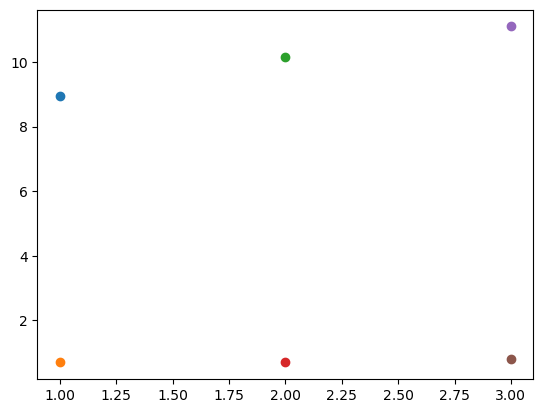

In [106]:
 plt.scatter(1, np.log( red.shape[0] ) )
 plt.scatter(1,  ubparamsred[2] )
 
 plt.scatter(2, np.log( nfa.shape[0] ) )
 plt.scatter(2,  ubparamsnfa[2] )
 
 plt.scatter(3, np.log( qm9.shape[0] ) )
 plt.scatter(3,  ubparamsqm9[2] )
 